In [2]:
import glob
import csv
from functional import seq
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (11,7) 

In [3]:
{'p_0': 32249483.366054036,
 'alpha': 16.13693248948259,
 'd2': 8.357438989823809,
 'q_pereg': 39.69551208909747,
 'pist_omega': 136.13934539829398}

{'p_0': 32249483.366054036,
 'alpha': 16.13693248948259,
 'd2': 8.357438989823809,
 'q_pereg': 39.69551208909747,
 'pist_omega': 136.13934539829398}

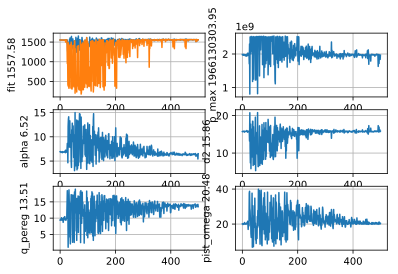

In [6]:
all_data = []
for fn in glob.glob('p_max_2GPa.csv'):
    with open(fn) as f:
        reader = csv.DictReader(f)
        for l in reader:
            all_data.append(l)
def get_some(name):
    top_gener = [d for d in all_data if d['Cq'] == '2.0']
    l = seq(top_gener) \
        .map(lambda d: float(d[name])) \
        .to_list()[-500:]
    plt.plot(l)
    plt.ylabel(f'{name} {l[-1]:.2f}')
    plt.grid(True)
    
plt.subplot(321)
get_some('V_max')
get_some('fit')

plt.subplot(322)
get_some('p_max')
plt.subplot(323)
get_some('alpha')
plt.subplot(324)
get_some('d2')
plt.subplot(325)
get_some('q_pereg')
plt.subplot(326)
get_some('pist_omega')

plt.show()


In [7]:
# all_data1000 = all_data

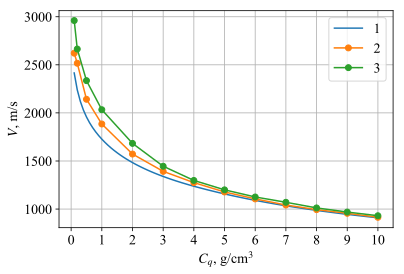

In [22]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams.update({'font.size': 14})

cqs_vds = np.load('He_simple_p100.npy')
plt.plot(cqs_vds[0][:100], cqs_vds[1][:100], '-', label='1')

grouped = seq(all_data1000).group_by(lambda d: d['Cq']).to_list()
cqs = seq(grouped).map(lambda tp: (tp[0], seq(tp[1]).max_by(lambda od: float(od['fit']))['V_max']))\
    .map(lambda tp: (float(tp[0]), float(tp[1]))).filter(lambda tp: tp[0] < 11).sorted(lambda tp: tp[0]).to_list()
cqs = np.array(cqs).T

plt.plot(cqs[0, [0,1,2,3,4,6,7,8,9,10,11,12,13]], cqs[1, [0,1,2,3,4,6,7,8,9,10,11,12,13]], 'o-', label='2')

grouped = seq(all_data).group_by(lambda d: d['Cq']).to_list()
cqs = seq(grouped).map(lambda tp: (tp[0], seq(tp[1]).max_by(lambda od: float(od['fit']))['V_max']))\
    .map(lambda tp: (float(tp[0]), float(tp[1]))).filter(lambda tp: tp[0] < 11).sorted(lambda tp: tp[0]).to_list()
cqs = np.array(cqs).T

cqs[1, 4] += 70
plt.plot(cqs[0], cqs[1], 'o-', label='3')

plt.grid()
plt.legend()

# z  =np.polyfit(cqs[0], cqs[1],10)
# p = np.poly1d(z)
# xs = cqs_vds[0][:100]
# plt.plot(xs, p(xs), ':')

plt.xticks(np.linspace(0,10,11))
plt.xlabel('$C_q$, g/cm$^3$')
plt.ylabel('$V$, m/s')
plt.savefig('4Nikita.png', bbox_inches='tight',dpi=300)

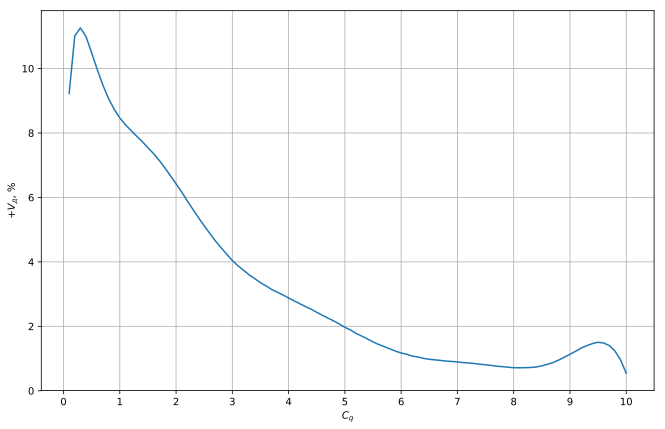

In [78]:
plt.plot(xs, (p(xs)-cqs_vds[1][:100])/cqs_vds[1][:100]*100)
plt.grid()
plt.xticks(np.linspace(0,10,11))
plt.xlabel('$C_q$')
plt.ylabel('$+V_д$, %')
plt.show()

In [54]:
import sqlite3

In [55]:
from sqlitedict import SqliteDict
mydict = SqliteDict('dbTest.sqlite', autocommit=True)


In [56]:
mydict['some_key']

OrderedDict([('p_0', '55000000.0'),
             ('alpha', '16.5'),
             ('d2', '12.5'),
             ('q_pereg', '25.5'),
             ('pist_omega', '85.0'),
             ('Cq', '1.0'),
             ('V_max', '583.0862663178586'),
             ('p_max', '436668396.6828259'),
             ('shtraf', '0'),
             ('fit', '583.0862663178586')])

In [14]:
mydict2 = SqliteDict('dbTest.sqlite', autocommit=True)

OrderedDict([('p_0', '55000000.0'),
             ('alpha', '16.5'),
             ('d2', '12.5'),
             ('q_pereg', '25.5'),
             ('pist_omega', '85.0'),
             ('Cq', '1.0'),
             ('V_max', '583.0862663178586'),
             ('p_max', '436668396.6828259'),
             ('shtraf', '0'),
             ('fit', '583.0862663178586')])

In [20]:
for key, value in mydict.iteritems():
    print(key, value)
print(len(mydict)) # etc... all dict functions work
mydict.close()

some_key OrderedDict([('p_0', '55000000.0'), ('alpha', '16.5'), ('d2', '12.5'), ('q_pereg', '25.5'), ('pist_omega', '85.0'), ('Cq', '1.0'), ('V_max', '583.0862663178586'), ('p_max', '436668396.6828259'), ('shtraf', '0'), ('fit', '583.0862663178586')])
1


In [22]:
# Коныертируем все данные в db
all_data = []
for fn in glob.glob('*.csv'):
    with open(fn) as f:
        reader = csv.DictReader(f)
        for d in reader:
            d = {k: float(d[k]) for k in d}
            all_data.append(d)

In [160]:
import os
mywd = os.getcwd()
def get_curr_best2000(Cq):
    fn = mywd+f'\\p_max_2GPa.csv'
    data = []
    with open(fn) as f:
        reader = csv.DictReader(f)
        for d in reader:
            d = {k: float(d[k]) for k in d}
            data.append(d)
    top_gener = [d for d in all_data if d['Cq'] == f'{Cq}']
    best_dict = seq(top_gener).max_by(lambda od: float(od['fit']))
    result = np.zeros(4)
    result[0] = (best_dict['alpha'] - diaps[0][0])/(diaps[0][1] - diaps[0][0])
    result[1] = (best_dict['d2']    - diaps[1][0])/(diaps[1][1] - diaps[1][0])
    result[2] = (best_dict['q_pereg'] - diaps[2][0])/(diaps[2][1] - diaps[2][0])
    result[3] = (best_dict['pist_omega'] - diaps[3][0])/(diaps[3][1] - diaps[3][0])
    return best_dict

get_curr_best2000(0.2)

OrderedDict([('p_0', '100000000.0'),
             ('alpha', '5.385992370023284'),
             ('d2', '11.7832298105444'),
             ('q_pereg', '10.156172248092835'),
             ('pist_omega', '7.155650245273398'),
             ('Cq', '0.2'),
             ('V_max', '2586.773306180152'),
             ('p_max', '1669217705.2946858'),
             ('shtraf', '0'),
             ('fit', '2586.773306180152')])